In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
path = os.path.join('..', 'data', 'final_cleaned_reviews.csv')
df = pd.read_csv(path)

In [6]:
print("Shape: ", df.shape)
print('=================')
print(df['Sentiment'].value_counts())
print('=================')
print(df.isnull().sum())

Shape:  (393579, 2)
Sentiment
positive    306758
negative     57067
neutral      29754
Name: count, dtype: int64
Clean_Text    1
Sentiment     0
dtype: int64


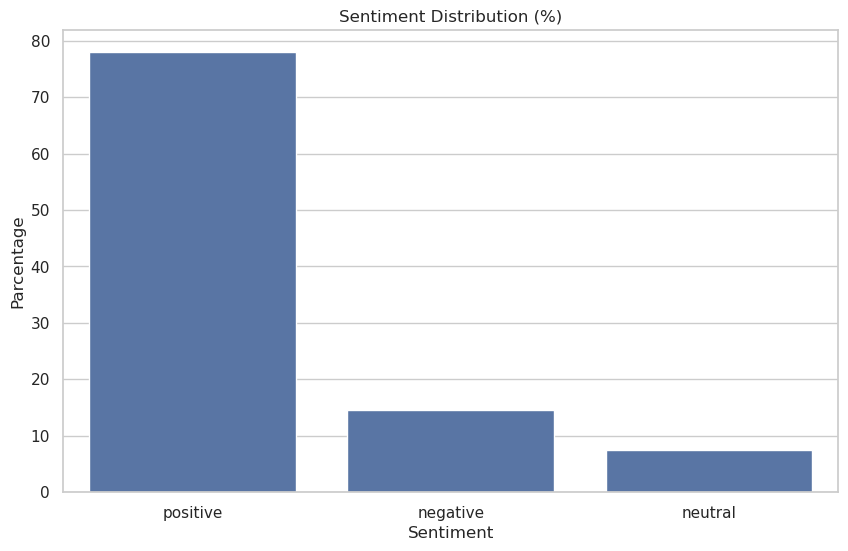

In [8]:
class_dist = df['Sentiment'].value_counts(normalize=True) * 100

sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Sentiment Distribution (%)")
plt.ylabel("Parcentage")
plt.xlabel("Sentiment")
plt.show()

In [10]:
df

,Clean_Text,Sentiment
0,bought several vitality canned dog food produc...,positive
1,product arrived labeled jumbo salted peanutsth...,negative
2,confection around century light pillowy citrus...,positive
3,looking secret ingredient robitussin believe f...,negative
4,great taffy great price wide assortment yummy ...,positive
...,...,...
393574,great sesame chickenthis good better resturant...,positive
393575,im disappointed flavor chocolate note especial...,negative
393576,star small give one training session tried tra...,positive
393577,best treat training rewarding dog good groomin...,positive


In [11]:
# add text length
df['Clean_Text'] = df['Clean_Text'].fillna('') 
df["Text_length"] = df['Clean_Text'].apply(lambda x: len(x.split()))